In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from utils.read_data import read_data_function
from utils.ingredients import process_ingredients
from utils.clustering_methods import KMeans_clustering
from sklearn.preprocessing import MultiLabelBinarizer, OneHotEncoder
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score, silhouette_samples, davies_bouldin_score
import umap

## Data Preprocessing

In [12]:
data = read_data_function('cocktail_dataset.json')
df = pd.DataFrame(data)
df.head(15)

,id,name,category,glass,tags,instructions,imageUrl,alcoholic,createdAt,updatedAt,ingredients
0,11000,Mojito,Cocktail,Highball glass,"[IBA, ContemporaryClassic, Alcoholic, USA, Asi...",Muddle mint leaves with sugar and lime juice. ...,https://cocktails.solvro.pl/images/ingredients...,1,2024-08-18T19:01:17.000+00:00,2024-08-18T19:06:16.000+00:00,"[{'id': 170, 'name': 'Soda water', 'descriptio..."
1,11001,Old Fashioned,Cocktail,Old-fashioned glass,"[IBA, Classic, Alcoholic, Expensive, Savory]",Place sugar cube in old fashioned glass and sa...,https://cocktails.solvro.pl/images/ingredients...,1,2024-08-18T19:01:58.000+00:00,2024-08-18T19:06:17.000+00:00,"[{'id': 513, 'name': 'Water', 'description': '..."
2,11002,Long Island Tea,Ordinary Drink,Highball glass,"[Strong, Asia, StrongFlavor, Brunch, Vegetaria...",Combine all ingredients (except cola) and pour...,https://cocktails.solvro.pl/images/ingredients...,1,2024-08-18T19:01:58.000+00:00,2024-08-18T19:06:17.000+00:00,"[{'id': 305, 'name': 'Light Rum', 'description..."
3,11003,Negroni,Ordinary Drink,Old-fashioned glass,"[IBA, Classic]","Stir into glass over ice, garnish and serve.",https://cocktails.solvro.pl/images/ingredients...,1,2024-08-18T19:01:58.000+00:00,2024-08-18T19:06:17.000+00:00,"[{'id': 482, 'name': 'Sweet Vermouth', 'descri..."
4,11004,Whiskey Sour,Ordinary Drink,Old-fashioned glass,"[IBA, Classic, Alcoholic, ContemporaryClassic]","Shake with ice. Strain into chilled glass, gar...",https://cocktails.solvro.pl/images/ingredients...,1,2024-08-18T19:01:59.000+00:00,2024-08-18T19:06:18.000+00:00,"[{'id': 409, 'name': 'Powdered Sugar', 'descri..."
5,11005,Dry Martini,Cocktail,Cocktail glass,"[IBA, Classic, Christmas, Alcoholic]",Straight: Pour all ingredients into mixing gla...,https://cocktails.solvro.pl/images/ingredients...,1,2024-08-18T19:06:18.000+00:00,2024-08-18T19:06:18.000+00:00,"[{'id': 189, 'name': 'Dry Vermouth', 'descript..."
6,11006,Daiquiri,Ordinary Drink,Cocktail glass,"[IBA, Classic, Beach]",Pour all ingredients into shaker with ice cube...,https://cocktails.solvro.pl/images/ingredients...,1,2024-08-18T19:06:18.000+00:00,2024-08-18T19:06:18.000+00:00,"[{'id': 305, 'name': 'Light Rum', 'description..."
7,11007,Margarita,Ordinary Drink,Cocktail glass,"[IBA, ContemporaryClassic]",Rub the rim of the glass with the lime slice t...,https://cocktails.solvro.pl/images/ingredients...,1,2024-08-18T19:06:19.000+00:00,2024-08-18T19:06:19.000+00:00,"[{'id': 4, 'name': 'Tequila', 'description': '..."
8,11008,Manhattan,Cocktail,Cocktail glass,"[IBA, Classic, Alcoholic]","Stirred over ice, strained into a chilled glas...",https://cocktails.solvro.pl/images/ingredients...,1,2024-08-18T19:06:19.000+00:00,2024-08-18T19:06:19.000+00:00,"[{'id': 20, 'name': 'Angostura Bitters', 'desc..."
9,11009,Moscow Mule,Punch / Party Drink,Copper Mug,"[IBA, ContemporaryClassic]",Combine vodka and ginger beer in a highball gl...,https://cocktails.solvro.pl/images/ingredients...,1,2024-08-18T19:06:20.000+00:00,2024-08-18T19:06:20.000+00:00,"[{'id': 1, 'name': 'Vodka', 'description': 'Vo..."


Selection of features relevant to clusterization:
-> category
-> glass
-> alcoholic
-> tags
-> alcoholic
-> ingredients

In [13]:
print(df[['category', 'glass','tags', 'ingredients']].dtypes)

category       object
glass          object
tags           object
ingredients    object
dtype: object


__ONE-HOT ENCODING__ 
1) category, glass

In [14]:
ohe = OneHotEncoder(sparse_output=False)

encoded_category_glass = ohe.fit_transform(df[['category', 'glass']])

df_ohe = pd.DataFrame(encoded_category_glass, columns=ohe.get_feature_names_out(['category', 'glass']))
df_ohe.head()


,category_Cocktail,category_Ordinary Drink,category_Punch / Party Drink,glass_Brandy snifter,glass_Champagne flute,glass_Cocktail glass,glass_Collins glass,glass_Copper Mug,glass_Highball glass,glass_Old-fashioned glass,glass_Pousse cafe glass,glass_Whiskey Glass,glass_Whiskey sour glass,glass_White wine glass
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


__ONE-HOT ENCODING__
2) ingredients

In [15]:
df_ingredients = df['ingredients'].apply(process_ingredients)

df_ingredients.head()


0           [Soda water, Light Rum, Lime, Mint, Sugar]
1           [Water, Sugar, Angostura Bitters, Bourbon]
2    [Light Rum, lemon, Vodka, Gin, Tequila, Coca-C...
3                       [Sweet Vermouth, Gin, Campari]
4     [Powdered Sugar, lemon, Blended Whiskey, Cherry]
Name: ingredients, dtype: object

_! Note: MultiLabelBinarizer works correctly only when the values in all rows of a column are lists_

In [16]:
mlb = MultiLabelBinarizer()
ingredients_encoded = pd.DataFrame(mlb.fit_transform(df_ingredients), columns=mlb.classes_)
ingredients_encoded.head()

,Amaretto,Angostura Bitters,Apple Brandy,Applejack,Apricot Brandy,Añejo Rum,Banana,Benedictine,Bitters,Blackberry Brandy,...,Tonic Water,Triple Sec,Vodka,Water,Whipped Cream,White Creme de Menthe,Wine,Worcestershire Sauce,Yellow Chartreuse,lemon
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


__ONE-HOT ENCODING__ 
3) tags

In [17]:
df_tags = df['tags']
df_tags.head()

0    [IBA, ContemporaryClassic, Alcoholic, USA, Asi...
1         [IBA, Classic, Alcoholic, Expensive, Savory]
2    [Strong, Asia, StrongFlavor, Brunch, Vegetaria...
3                                       [IBA, Classic]
4       [IBA, Classic, Alcoholic, ContemporaryClassic]
Name: tags, dtype: object

Convert empty None values to empty lists in the 'tags' column:

In [18]:
df_tags = df['tags'].apply(lambda x: x if isinstance(x, list) else [])

In [19]:
mlb_tags = MultiLabelBinarizer()
tags_encoded = pd.DataFrame(mlb_tags.fit_transform(df_tags), columns=mlb_tags.classes_)

In [20]:
tags_encoded.head()

,Alcoholic,Asia,Beach,Breakfast,Brunch,Chilli,Christmas,Citrus,Classic,Cold,...,NewEra,Nutty,Savory,Sour,Strong,StrongFlavor,Summer,USA,Vegan,Vegetarian
0,1,1,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,1,1,0
1,1,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
2,0,1,0,0,1,0,0,0,0,0,...,0,0,0,1,1,1,0,0,0,1
3,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


Combine all encoded columns into a data frame

In [21]:
df_encoded = pd.concat([df['name'],df_ohe, df['alcoholic'], ingredients_encoded, tags_encoded], axis=1)
df_encoded.head(2)

,name,category_Cocktail,category_Ordinary Drink,category_Punch / Party Drink,glass_Brandy snifter,glass_Champagne flute,glass_Cocktail glass,glass_Collins glass,glass_Copper Mug,glass_Highball glass,...,NewEra,Nutty,Savory,Sour,Strong,StrongFlavor,Summer,USA,Vegan,Vegetarian
0,Mojito,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0,0,0,0,0,0,0,1,1,0
1,Old Fashioned,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,1,0,0,0,0,0,0,0


In [22]:
df_encoded_cleaned = df_encoded.drop(columns=['name'])

_The normalization step is skipped because all features are zero-one_

# K-MEANS CLUSTERING

__The Elbow Method__
The elbow method is a graphical method for finding the optimal K value in a k-means clustering algorithm. The optimal K value is the point at which the graph forms an elbow.

__THE ELBOW GRAPH__

_WCSS (Within-Cluster Sum of Squares)_

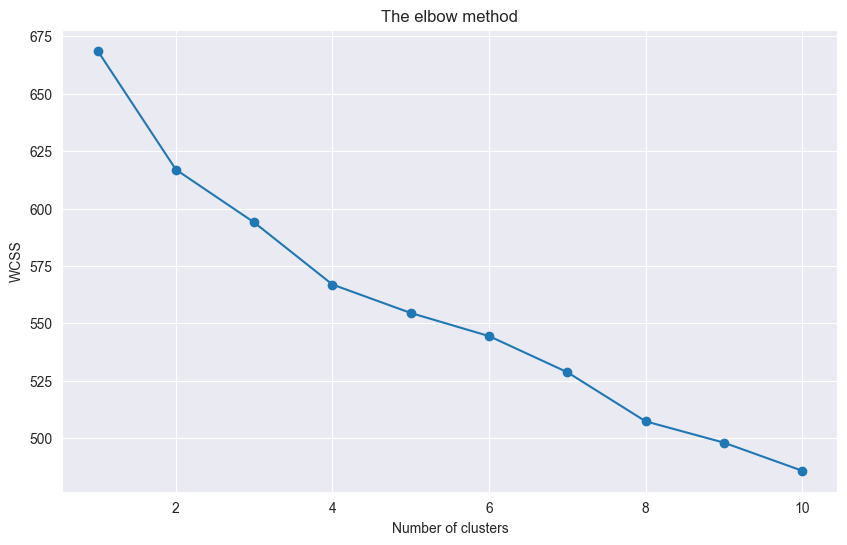

In [23]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df_encoded_cleaned)
    wcss.append(kmeans.inertia_)
    # Inertia is the sum of the squared distances of data points from the nearest cluster centroid.

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.title('The elbow method')
plt.show()

_It can be seen that a potentially good choice of the number of clusters would be 4, possibly 6._

In [24]:
n = 4

In [25]:
df_encoded_cleaned = KMeans_clustering(n_clusters=n, df=df_encoded_cleaned)
df_encoded_cleaned.head()

,category_Cocktail,category_Ordinary Drink,category_Punch / Party Drink,glass_Brandy snifter,glass_Champagne flute,glass_Cocktail glass,glass_Collins glass,glass_Copper Mug,glass_Highball glass,glass_Old-fashioned glass,...,Nutty,Savory,Sour,Strong,StrongFlavor,Summer,USA,Vegan,Vegetarian,cluster
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0,0,0,0,0,0,1,1,0,3
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0,1,0,0,0,0,0,0,0,0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0,0,1,1,1,0,0,0,1,3
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0,0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0,2


__ANALYSIS OF RESULTS__

In [26]:
cluster_counts = df_encoded_cleaned['cluster'].value_counts()
print(cluster_counts)

cluster
1    56
3    33
0    32
2    13
Name: count, dtype: int64


In [27]:
df_final = pd.concat([df[['name', 'category', 'tags', 'alcoholic']], df_ingredients, df_encoded_cleaned['cluster']], axis=1)
df_final.head()

,name,category,tags,alcoholic,ingredients,cluster
0,Mojito,Cocktail,"[IBA, ContemporaryClassic, Alcoholic, USA, Asi...",1,"[Soda water, Light Rum, Lime, Mint, Sugar]",3
1,Old Fashioned,Cocktail,"[IBA, Classic, Alcoholic, Expensive, Savory]",1,"[Water, Sugar, Angostura Bitters, Bourbon]",0
2,Long Island Tea,Ordinary Drink,"[Strong, Asia, StrongFlavor, Brunch, Vegetaria...",1,"[Light Rum, lemon, Vodka, Gin, Tequila, Coca-C...",3
3,Negroni,Ordinary Drink,"[IBA, Classic]",1,"[Sweet Vermouth, Gin, Campari]",0
4,Whiskey Sour,Ordinary Drink,"[IBA, Classic, Alcoholic, ContemporaryClassic]",1,"[Powdered Sugar, lemon, Blended Whiskey, Cherry]",2


In [28]:
cluster_groups = df_final.groupby('cluster')['name'].apply(list)

for cluster, drinks in cluster_groups.items():
    print(f"Cluster {cluster}:")
    for drink in drinks:
        print(f"  - {drink}")
    print() 

Cluster 0:
  - Old Fashioned
  - Negroni
  - Alabama Slammer
  - Archbishop
  - Arthur Tompkins
  - Bermuda Highball
  - Classic Old-Fashioned
  - Bourbon Sling
  - Bourbon Sour
  - Boxcar
  - Brandy Cobbler
  - Brandy Flip
  - Casino Royale
  - Dragonfly
  - English Highball
  - Flying Dutchman
  - Gentleman's Club
  - Gin And Tonic
  - Gin Cooler
  - Gin Daisy
  - Gin Sling
  - Gin Smash
  - Gin Sour
  - Gin Squirt
  - Gin Swizzle
  - Gin Toddy
  - Grass Skirt
  - John Collins
  - Kentucky B And B
  - Lone Tree Cooler
  - Orange Oasis
  - Pink Gin

Cluster 1:
  - Dry Martini
  - Daiquiri
  - Manhattan
  - After Dinner Cocktail
  - After Supper Cocktail
  - Alaska Cocktail
  - Alexander
  - Alfie Cocktail
  - Algonquin
  - Allegheny
  - Allies Cocktail
  - Almeria
  - Almond Joy
  - Amaretto And Cream
  - Amaretto Stinger
  - Angel Face
  - Applecar
  - Artillery
  - Balmoral
  - Blackthorn
  - Blue Margarita
  - Bluebird
  - Bobby Burns Cocktail
  - Boomerang
  - Boston Sidecar
  - C

## __METRICS__

In [29]:
data_for_clustering = df_encoded_cleaned.drop(columns='cluster')

silhouette_avg = silhouette_score(data_for_clustering, df_encoded_cleaned['cluster'])
print(f"Average Silhouette Coefficient: {silhouette_avg:.3f}")

Average Silhouette Coefficient: 0.081


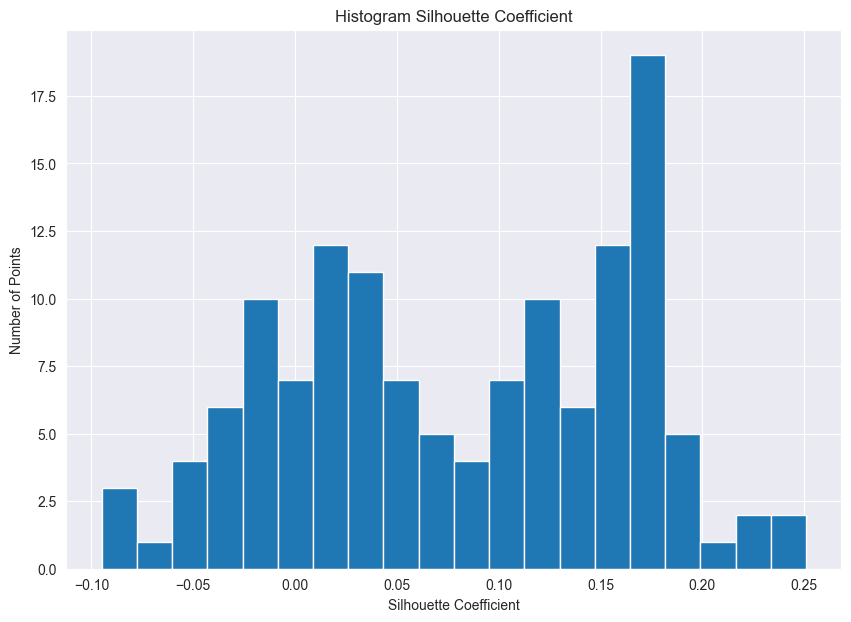

In [30]:
silhouette_values = silhouette_samples(data_for_clustering, df_encoded_cleaned['cluster'])

plt.figure(figsize=(10, 7))
plt.hist(silhouette_values, bins=20)
plt.title('Histogram Silhouette Coefficient')
plt.xlabel('Silhouette Coefficient')
plt.ylabel('Number of Points')
plt.show()

__Coefficient for other numbers of clusters__

In [31]:
from sklearn.metrics import silhouette_score

clusters_list = [2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 25, 30, 40, 50]
silhouette_scores = []

for n_clusters in clusters_list:
    data_for_clustering=df_encoded_cleaned.drop(columns='cluster')
    data_with_clusters = KMeans_clustering(n_clusters, data_for_clustering)
    silhouette_avg = silhouette_score(data_for_clustering, data_with_clusters['cluster'])
    print(f"Number of clusters: {n_clusters}, Average Silhouette Coefficient: {silhouette_avg:.3f}")
    silhouette_scores.append(silhouette_avg)


Number of clusters: 2, Average Silhouette Coefficient: 0.111
Number of clusters: 3, Average Silhouette Coefficient: 0.116
Number of clusters: 4, Average Silhouette Coefficient: 0.142
Number of clusters: 5, Average Silhouette Coefficient: 0.150
Number of clusters: 6, Average Silhouette Coefficient: 0.153
Number of clusters: 7, Average Silhouette Coefficient: 0.129
Number of clusters: 8, Average Silhouette Coefficient: 0.136
Number of clusters: 9, Average Silhouette Coefficient: 0.134
Number of clusters: 10, Average Silhouette Coefficient: 0.157
Number of clusters: 15, Average Silhouette Coefficient: 0.172
Number of clusters: 20, Average Silhouette Coefficient: 0.191
Number of clusters: 25, Average Silhouette Coefficient: 0.223
Number of clusters: 30, Average Silhouette Coefficient: 0.233
Number of clusters: 40, Average Silhouette Coefficient: 0.250
Number of clusters: 50, Average Silhouette Coefficient: 0.252


The graph will help visualize the cluster number that gives the best silhouette score (higher is better)

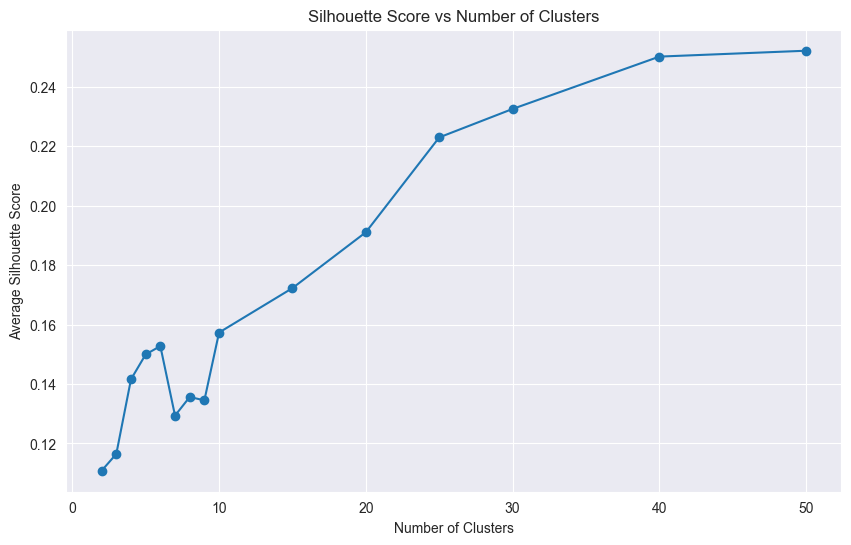

In [32]:
plt.figure(figsize=(10, 6))
plt.plot(clusters_list, silhouette_scores, marker='o')
plt.title('Silhouette Score vs Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Average Silhouette Score')
plt.grid(True)
plt.show()

__Conclusions of the author of the analysis__

_The clusters might not be well-separated, meaning that data points are almost as close to points in other clusters as they are to points in their own cluster. This happens when the clusters overlap or aren't distinct enough._

_Silhouette scores around 0–0.2 suggest that the clustering algorithm is struggling to create clear, distinct clusters, possibly due to the choice of n_clusters or structure of the data._

__Next metric: Davies-Bouldin__

The Davies-Bouldin score is a metric used to evaluate the quality of clustering results in unsupervised learning. It measures how well clusters are separated from each other while also considering the compactness of each cluster. __The lower the Davies-Bouldin score = the better the clustering__

In [33]:
clusters_list = [2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 25, 30, 35]
davies_bouldin_list= []

for n_clusters in clusters_list:
    data_for_clustering=df_encoded_cleaned.drop(columns='cluster')
    data_with_clusters = KMeans_clustering(n_clusters, data_for_clustering)
    davies_bouldin_avg = davies_bouldin_score(data_for_clustering, data_with_clusters['cluster'])
    print(f"Number of clusters: {n_clusters}, Davies-Bouldin Score: {davies_bouldin_avg:.3f}")
    davies_bouldin_list.append(davies_bouldin_avg)

Number of clusters: 2, Davies-Bouldin Score: 2.604
Number of clusters: 3, Davies-Bouldin Score: 2.432
Number of clusters: 4, Davies-Bouldin Score: 2.188
Number of clusters: 5, Davies-Bouldin Score: 2.275
Number of clusters: 6, Davies-Bouldin Score: 1.962
Number of clusters: 7, Davies-Bouldin Score: 1.967
Number of clusters: 8, Davies-Bouldin Score: 2.007
Number of clusters: 9, Davies-Bouldin Score: 1.854
Number of clusters: 10, Davies-Bouldin Score: 1.753
Number of clusters: 15, Davies-Bouldin Score: 1.473
Number of clusters: 20, Davies-Bouldin Score: 1.294
Number of clusters: 25, Davies-Bouldin Score: 1.101
Number of clusters: 30, Davies-Bouldin Score: 1.035
Number of clusters: 35, Davies-Bouldin Score: 0.962


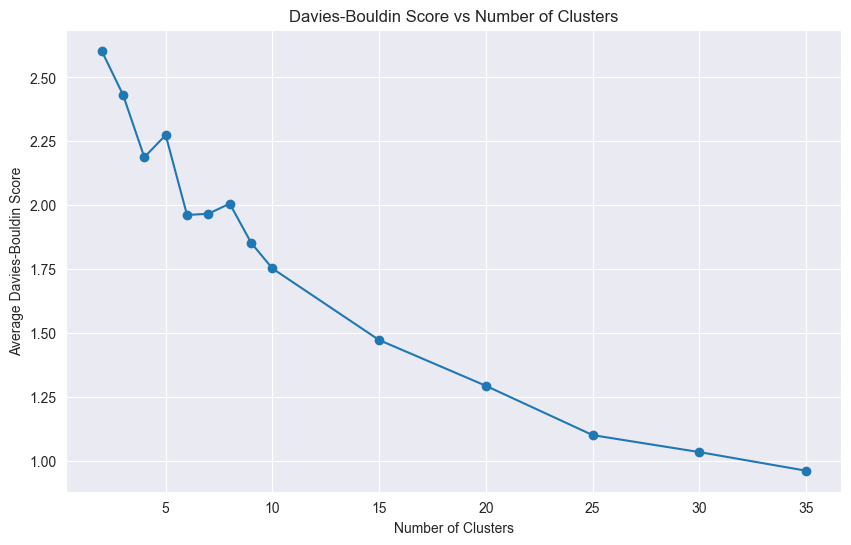

In [34]:
plt.figure(figsize=(10, 6))
plt.plot(clusters_list, davies_bouldin_list, marker='o')
plt.title('Davies-Bouldin Score vs Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Average Davies-Bouldin Score')
plt.grid(True)
plt.show()

_It is visible that the decrease of Davies-Bouldin occurs for both clusters 4 and 6.
For a larger number of clusters, the Davies-Bouldin score decreases further. However, I don't think that more clusters are useful. Of course, it depends on the use of clustering._

# UMAP for Dimensionality Reduction

_UMAP_ is a powerful dimensionality reduction technique often used before clustering or visualization. That's why I use this technique as a preprocessing of K-Means clustering.

In [35]:
# UMAP for dimensionality reduction
reducer = umap.UMAP(n_components=2, random_state=42)
umap_embedding = reducer.fit_transform(df_encoded_cleaned)

# K-means Clustering
n_clusters = 5  
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(umap_embedding)

# Metrics:
silhouette_avg = silhouette_score(umap_embedding, cluster_labels)
davies_bouldin_avg = davies_bouldin_score(umap_embedding, cluster_labels)

print(f"Silhouette Score: {silhouette_avg}")
print(f"Davies-Bouldin Score: {davies_bouldin_avg}")

C:\Users\WIKTORIA\Desktop\TheCoctails-ML\.venv\Lib\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Silhouette Score: 0.5930802822113037
Davies-Bouldin Score: 0.5974115197859557


## Visualization of clusters

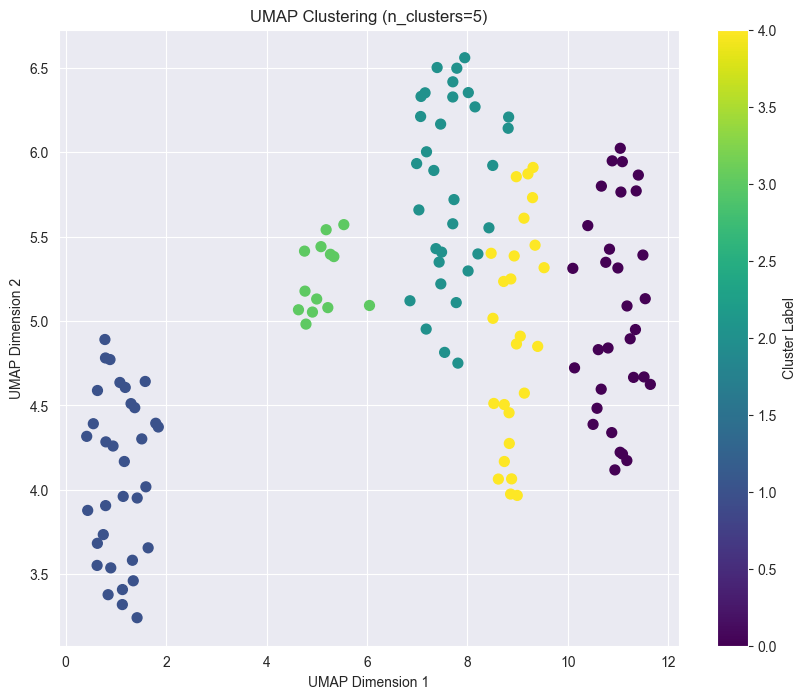

In [36]:
plt.figure(figsize=(10, 8))
plt.scatter(umap_embedding[:, 0], umap_embedding[:, 1], c=cluster_labels, cmap='viridis', s=50)
plt.title(f'UMAP Clustering (n_clusters={n_clusters})')
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')
plt.colorbar(label='Cluster Label')
plt.show()

__Testing for various numbers of clusters__

In [37]:
clusters_list = [2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 25, 30, 40, 50]

silhouette_scores = []
davies_bouldin_list= []

for n_clusters in clusters_list:

    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(umap_embedding)

    silhouette_avg = silhouette_score(umap_embedding, cluster_labels)
    davies_bouldin_avg = davies_bouldin_score(umap_embedding, cluster_labels)
    print(f"Number of clusters: {n_clusters}")
    print(f"Average Silhouette Coefficient: {silhouette_avg:.3f}")
    print(f"Davies-Bouldin Score: {davies_bouldin_avg:.3f}")
    print("----------------------")
    davies_bouldin_list.append(davies_bouldin_avg)
    silhouette_scores.append(silhouette_avg)
    

Number of clusters: 2
Average Silhouette Coefficient: 0.680
Davies-Bouldin Score: 0.452
----------------------
Number of clusters: 3
Average Silhouette Coefficient: 0.575
Davies-Bouldin Score: 0.592
----------------------
Number of clusters: 4
Average Silhouette Coefficient: 0.612
Davies-Bouldin Score: 0.465
----------------------
Number of clusters: 5
Average Silhouette Coefficient: 0.593
Davies-Bouldin Score: 0.597
----------------------
Number of clusters: 6
Average Silhouette Coefficient: 0.593
Davies-Bouldin Score: 0.549
----------------------
Number of clusters: 7
Average Silhouette Coefficient: 0.493
Davies-Bouldin Score: 0.714
----------------------
Number of clusters: 8
Average Silhouette Coefficient: 0.441
Davies-Bouldin Score: 0.835
----------------------
Number of clusters: 9
Average Silhouette Coefficient: 0.442
Davies-Bouldin Score: 0.792
----------------------
Number of clusters: 10
Average Silhouette Coefficient: 0.475
Davies-Bouldin Score: 0.737
----------------------


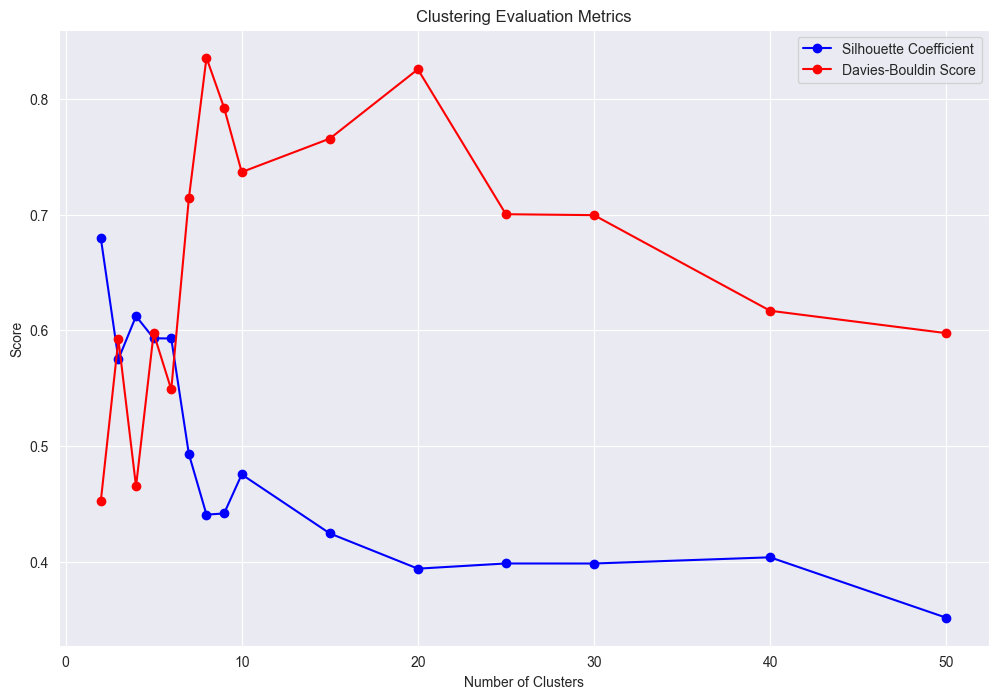

In [38]:
plt.figure(figsize=(12, 8))
plt.plot(clusters_list, silhouette_scores, marker='o', color='b', label='Silhouette Coefficient')
plt.plot(clusters_list, davies_bouldin_list, marker='o', color='r', label='Davies-Bouldin Score')
plt.title('Clustering Evaluation Metrics')
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.legend()
plt.grid(True)
plt.show()

_Again in the 0-10 range the best metrics occur for 4 and 6 clusters. I'm going to continue clustering with 4 clusters._

In [39]:
reducer = umap.UMAP(n_components=2, random_state=42)
umap_embedding = reducer.fit_transform(df_encoded_cleaned)

n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(umap_embedding)

silhouette_avg = silhouette_score(umap_embedding, cluster_labels)
davies_bouldin_avg = davies_bouldin_score(umap_embedding, cluster_labels)

print(f"Silhouette Score: {silhouette_avg}")
print(f"Davies-Bouldin Score: {davies_bouldin_avg}")

C:\Users\WIKTORIA\Desktop\TheCoctails-ML\.venv\Lib\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Silhouette Score: 0.612218976020813
Davies-Bouldin Score: 0.46514514104168586


In [40]:
df_final['cluster'] = cluster_labels

In [41]:
df_final[['name', 'cluster']].head()

,name,cluster
0,Mojito,1
1,Old Fashioned,0
2,Long Island Tea,1
3,Negroni,0
4,Whiskey Sour,3


__Number of drinks in a cluster__

In [42]:
cluster_counts = df_final['cluster'].value_counts()
print(cluster_counts)

cluster
2    57
1    33
0    31
3    13
Name: count, dtype: int64


In [43]:
cluster_groups = df_final.groupby('cluster')['name'].apply(list)

for cluster, drinks in cluster_groups.items():
    print(f"Cluster {cluster}:")
    for drink in drinks:
        print(f"  - {drink}")
    print() 

Cluster 0:
  - Old Fashioned
  - Negroni
  - Alabama Slammer
  - Archbishop
  - Arthur Tompkins
  - Bermuda Highball
  - Classic Old-Fashioned
  - Bourbon Sling
  - Bourbon Sour
  - Boxcar
  - Brandy Cobbler
  - Casino Royale
  - Dragonfly
  - English Highball
  - Flying Dutchman
  - Gentleman's Club
  - Gin And Tonic
  - Gin Cooler
  - Gin Daisy
  - Gin Sling
  - Gin Smash
  - Gin Sour
  - Gin Squirt
  - Gin Swizzle
  - Gin Toddy
  - Grass Skirt
  - John Collins
  - Kentucky B And B
  - Lone Tree Cooler
  - Orange Oasis
  - Pink Gin

Cluster 1:
  - Mojito
  - Long Island Tea
  - Margarita
  - Moscow Mule
  - Brandy Alexander
  - Amaretto Mist
  - Amaretto Rose
  - Amaretto Tea
  - Apricot Lady
  - Arise My Love
  - Banana Daiquiri
  - Black Russian
  - Bloody Maria
  - Bloody Mary
  - Blue Lagoon
  - Blue Mountain
  - Caipirinha
  - Champagne Cocktail
  - Chocolate Black Russian
  - Cuba Libre
  - Frozen Daiquiri
  - Frozen Mint Daiquiri
  - Godchild
  - Godfather
  - Godmother
  - Ha

In [44]:
print(f"Silhouette Score: {silhouette_avg}")
print(f"Davies-Bouldin Score: {davies_bouldin_avg}")

Silhouette Score: 0.612218976020813
Davies-Bouldin Score: 0.46514514104168586


# DBSCAN (Density-Based Spatial Clustering of Applications with Noise)

_DBSCAN has the advantage over KMeans because it does not require the number of clusters to be specified in advance, and it copes well with irregular cluster shapes and noise. Let's check it out ! :)_

In [45]:
umap_embedding = reducer.fit_transform(df_encoded_cleaned)

___DBSCAN - clustering___
_You can adjust parameters:_
__eps__ - the maximum distance between two points; detemining when points can be combined into one cluster
__min_samples__- the minimum number of points that must be in the neighborhood of radius *eps* (then the point can be considered as the central point of cluster)


In [46]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(umap_embedding)

In [47]:
df_final['dbscan_cluster'] = dbscan_labels

In [48]:
df_final[['name', 'dbscan_cluster']].head()

,name,dbscan_cluster
0,Mojito,0
1,Old Fashioned,1
2,Long Island Tea,0
3,Negroni,1
4,Whiskey Sour,2


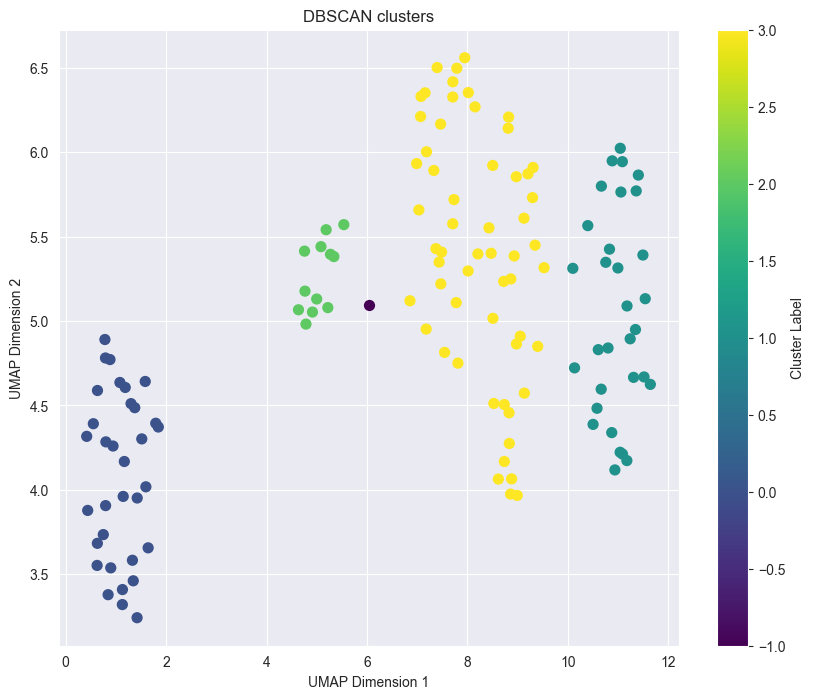

In [49]:
plt.figure(figsize=(10, 8))
plt.scatter(umap_embedding[:, 0], umap_embedding[:, 1], c=dbscan_labels, cmap='viridis', s=50)
plt.title('DBSCAN clusters')
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')
plt.colorbar(label='Cluster Label')
plt.show()


_One point (in the center - cluster '-1' ) is defined by algorithm as noise_

In [50]:
mask = dbscan_labels != -1
silhouette_avg = silhouette_score(umap_embedding[mask], dbscan_labels[mask])
print(f"Average Silhouette Coefficient: {silhouette_avg:.3f}")

Average Silhouette Coefficient: 0.616


__Conclusion__: _Based on the evaluation, it is clear that after dimensionality reduction, the K-Means and DBSCAN methods provide similar clustering quality. Therefore, the reduction was key._

# Visualizing results using the library: streamlit

In [51]:
df_final.to_csv("df_final.csv", index=False, encoding='utf-8')

print("The dataframe df_final was saved to a csv file!")

The dataframe df_final was saved to a csv file!


In [52]:
df_umap_clusters = pd.DataFrame({
    'name': df['name'],
    'UMAP Dim 1': umap_embedding[:, 0],
    'UMAP Dim 2': umap_embedding[:, 1], 
    'cluster': dbscan_labels
})

In [53]:
df_umap_clusters.to_csv('umap_dbscan_clusters.csv', index=False)

print("The dataframe umap_dbscan_clusters was saved to a csv file!")

The dataframe umap_dbscan_clusters was saved to a csv file!


_! Visualization of results in streamlit: results_visualization.py_